In [94]:
import os
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

DRIVE_PATH = "G:\Mi unidad\Runs"
MODEL = "efficientnetb1multiclass"
BINARY = False
EXECUCIO = 1
#llista_models = [d for d in os.listdir(DRIVE_PATH)]
models = {'alexnetbinary':'Ham10000-AlexnetBinary','resnet152binary':'Ham1000-Resnet152Binary',
          'inceptionv3binary':'Ham10000-Inceptionv3Binary','efficientnetb1binary':'Ham10000-EfficientNetB1Binary',
          'alexnetmulticlass':'Ham10000-AlexnetMulticlass','resnet152multiclass':'Ham10000Resnet152Multiclass',
          'inceptionv3multiclass':'Ham10000Iinceptionv3multiclass','efficientnetb1multiclass':'Ham10000-EfficientNetB1Multiclass'}



directori = DRIVE_PATH+'\\'+models[MODEL]+'\\'+str(EXECUCIO)
json_file_dir  = directori+"\\"+'testing_info.json'


with open(json_file_dir,"r") as file:
    data = json.load(file)

true_classes = np.array([]).astype(int)
predicted_classes = np.array([]).astype(int)

print(data[0])
for object in data:
    if BINARY:
        output = (np.squeeze(np.array(object['output'])) > 0.5).astype(int)
        target = np.squeeze(np.array(object['target']))
    else:
        output = (np.squeeze(np.argmax(np.array(object['output']),axis=1))).astype(int)
        target = np.squeeze(np.array(object['target']))

    true_classes = np.append(true_classes,target)
    predicted_classes = np.append(predicted_classes,output)

print(predicted_classes)
print(true_classes)
cm = confusion_matrix(true_classes,predicted_classes)

<>:8: SyntaxWarning: invalid escape sequence '\M'
<>:8: SyntaxWarning: invalid escape sequence '\M'
C:\Users\perej\AppData\Local\Temp\ipykernel_16204\2493403093.py:8: SyntaxWarning: invalid escape sequence '\M'
  DRIVE_PATH = "G:\Mi unidad\Runs"


{'output': [[0.0017273272387683392, 0.9901768565177917, 0.0028478349559009075, 0.0011796030448749661, 0.003435922786593437, 0.0005503098946064711, 8.215212437789887e-05], [0.0751487985253334, 0.9115660190582275, 0.00230825855396688, 0.0007895395974628627, 0.00015866139438003302, 0.009984909556806087, 4.384516068967059e-05], [0.9973938465118408, 0.0006138228345662355, 0.0010286354226991534, 0.00012523322948254645, 0.00013703732111025602, 0.00030222523491829634, 0.0003990704717580229], [0.9888731837272644, 0.003924285527318716, 0.005217064172029495, 0.0002483055286575109, 0.0009224116802215576, 0.0003324451099615544, 0.0004822862974833697], [0.9489466547966003, 0.0012928122887387872, 0.016195176169276237, 0.00266899517737329, 0.0004758122959174216, 0.00030444611911661923, 0.030116088688373566], [2.1704980099457316e-05, 0.0013597313081845641, 0.0001505390537204221, 0.0001782515028025955, 0.0010693519143387675, 3.631689651228953e-06, 0.9972168207168579], [0.997672975063324, 0.0016851538093

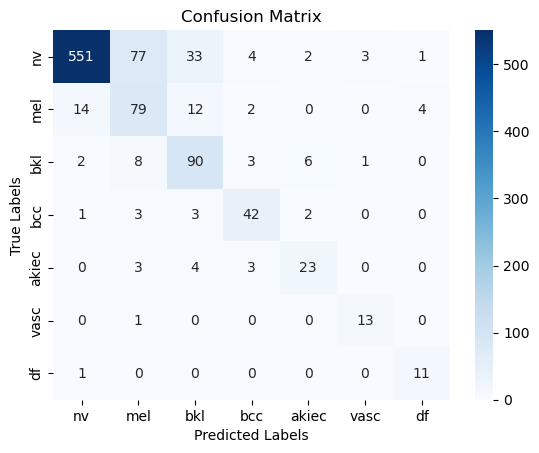

In [95]:
if BINARY:
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign","Malign"], yticklabels=["Benign","Malign"])

    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()
else:
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["nv","mel","bkl","bcc","akiec","vasc","df"], 
                yticklabels=["nv","mel","bkl","bcc","akiec","vasc","df"])

    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

In [96]:
accuracy = accuracy_score(true_classes,predicted_classes)
precision = precision_score(true_classes,predicted_classes, average="weighted")  
recall = recall_score(true_classes,predicted_classes, average="weighted")
f1 = f1_score(true_classes,predicted_classes, average="weighted")
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

Accuracy: 0.8073852295409182
Precision: 0.850693460180275
Recall: 0.8073852295409182
F1-Score: 0.8204167848243116


In [97]:
unique_classes, counts = np.unique(true_classes, return_counts=True)
print(unique_classes)
print(counts)

[0 1 2 3 4 5 6]
[671 111 110  51  33  14  12]
